<a href="https://colab.research.google.com/github/TCU-DCDA/WRIT20833-2025/blob/main/notebooks/codeAlongs/WRIT20833_VADER_Sentiment_Analysis_F25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with VADER
## From Words to Emotions in Cultural Data

Welcome to sentiment analysis! Today we'll learn to analyze the **emotional tone** of cultural texts using VADER, a tool designed for social media and informal language.

### 🎯 What You'll Learn:
- **Install and use VADER** for sentiment analysis
- **Apply sentiment analysis** to your scraped cultural data
- **Interpret and visualize** emotional patterns in texts
- **Think critically** about automated emotion detection

### 🔗 Connection to Your Work:
This prepares you for **HW4-1**, where you'll analyze term frequency AND sentiment in your own dataset.

## Part 1: From Word Counting to Emotion Analysis

### Quick HW1 Refresher
In HW1, you counted frequent words and formed **first impressions** about different text types:
- Political documents had words like "shall," "constitution," "rights"
- Novels had character names and descriptive language
- You made predictions, then tested them by counting

### Today's Evolution
**Same prediction-testing process, new question:**
- HW1: "What words appear most often?"
- Today: "What emotions do these words express?"

Let's start with examples from cultural data like **YouTube comments** and **reviews**.

### 📖 Close Reading vs. Distant Reading

**Close Reading** (careful human interpretation):
- Reading individual texts carefully
- Noticing specific words, phrases, emotional nuances
- Making interpretive claims about meaning and tone

**Distant Reading** (computational pattern detection):
- Using tools like VADER to analyze many texts at once
- Detecting emotional patterns across large collections
- Asking questions impossible to answer by reading alone

**The Critical Connection**: 
You need close reading skills to **validate** distant reading results! 
- VADER gives you a score (0.772), but YOU must read the text to decide if that score makes sense
- When VADER fails on irony or sarcasm, only close reading can catch it
- Part 5 of this notebook specifically asks you to compare VADER's scores to your human judgment

**The Workflow**: Close read (predict) → Distant read (compute) → Close read again (validate)

In [1]:
# Setup: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We'll install VADER in the next cell
print("📚 Libraries imported - ready for sentiment analysis!")

📚 Libraries imported - ready for sentiment analysis!


In [2]:
# Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00
✅ VADER installed and ready!


## Part 2: VADER Basics with Cultural Examples

Let's test VADER with the kind of informal cultural texts you might find online:

In [3]:
# Cultural text examples - predict the sentiment first!
cultural_texts = [
    "This museum exhibition was absolutely AMAZING!!!",
    "worst movie ever made, complete waste of time",
    "The book was okay, nothing special but not terrible either",
    "I love love LOVE this artist's work! So inspiring ❤️",
    "The concert was good but the sound quality sucked"
]

print("🤔 Before we run VADER, predict:")
print("Which texts are positive? Negative? Neutral?")
print("Which will have the STRONGEST emotion?")
print("\nNow let's test your predictions...")

🤔 Before we run VADER, predict:
Which texts are positive? Negative? Neutral?
Which will have the STRONGEST emotion?

Now let's test your predictions...


In [4]:
# Test VADER on our cultural examples
print("VADER Sentiment Analysis Results:")
print("=" * 50)

for i, text in enumerate(cultural_texts, 1):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']  # This is our main score (-1 to 1)

    print(f"{i}. Text: {text}")
    print(f"   Compound Score: {compound:.3f}")
    print(f"   Breakdown: {scores}")
    print()

VADER Sentiment Analysis Results:
1. Text: This museum exhibition was absolutely AMAZING!!!
   Compound Score: 0.772
   Breakdown: {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.7719}

2. Text: worst movie ever made, complete waste of time
   Compound Score: -0.784
   Breakdown: {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.7845}

3. Text: The book was okay, nothing special but not terrible either
   Compound Score: 0.486
   Breakdown: {'neg': 0.121, 'neu': 0.522, 'pos': 0.357, 'compound': 0.4857}

4. Text: I love love LOVE this artist's work! So inspiring ❤️
   Compound Score: 0.960
   Breakdown: {'neg': 0.0, 'neu': 0.289, 'pos': 0.711, 'compound': 0.9598}

5. Text: The concert was good but the sound quality sucked
   Compound Score: -0.468
   Breakdown: {'neg': 0.309, 'neu': 0.541, 'pos': 0.151, 'compound': -0.4678}



### 🔍 How Does VADER Know What's Positive or Negative?

VADER uses a **sentiment lexicon** - a dictionary of ~7,500 words with pre-assigned emotion scores:
- "amazing" = +3.1 (very positive)
- "okay" = +0.9 (mildly positive)  
- "terrible" = -2.3 (very negative)

**See the lexicon yourself**: [VADER Lexicon on GitHub](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt)

**VADER also adjusts for**:
- Capitalization ("AMAZING" scores higher than "amazing")
- Punctuation ("good!!!" scores higher than "good")
- Emoticons and emojis (😍, ❤️)
- Context clues ("not good" reverses the score)

**Critical question**: What cultural assumptions are built into this lexicon? Who decided these scores?

### 🎯 Quick Check: Understanding VADER Scores

**Compound Score** (your main number):
- **+1.0** = extremely positive
- **0.0** = neutral  
- **-1.0** = extremely negative

**Individual Scores** (show how VADER thinks):
- **pos**: percentage of positive words
- **neg**: percentage of negative words  
- **neu**: percentage of neutral words

**Notice**: VADER catches intensity ("AMAZING!!!") and mixed emotions ("good but sucked")!

### VADER vs. TextBlob: Quick Comparison

Let's see how different tools can give different results:

In [5]:
# Install TextBlob for comparison
!pip install textblob
from textblob import TextBlob

# Compare on a tricky example
test_text = "This movie is SO good!!! I can't even 😍"

# VADER analysis
vader_score = analyzer.polarity_scores(test_text)['compound']

# TextBlob analysis
blob = TextBlob(test_text)
textblob_score = blob.sentiment.polarity

print(f"Text: {test_text}")
print(f"VADER score: {vader_score:.3f}")
print(f"TextBlob score: {textblob_score:.3f}")
print("\n💡 VADER is better with informal language, caps, and emoticons!")

Text: This movie is SO good!!! I can't even 😍
VADER score: 0.619
TextBlob score: 1.000

💡 VADER is better with informal language, caps, and emoticons!


## Part 3: Applying VADER to Your Cultural Dataset

Now let's work with the kind of data you collected in the Instant Data Scraper lesson:

In [6]:
# Create sample cultural data (like what you scraped)
sample_reviews = {
    'title': ['Hamilton', 'Cats', 'The Lion King', 'Phantom of the Opera', 'Chicago',
              'Wicked', 'Les Misérables', 'Mamma Mia!', 'Book of Mormon', 'Dear Evan Hansen'],
    'review_text': [
        "Absolutely brilliant musical! The hip-hop history was incredible and the cast was amazing.",
        "I really didn't understand what was happening. Weird costumes and confusing plot.",
        "Beautiful production with stunning visuals. The Circle of Life scene gave me chills!",
        "Classic for a reason. The phantom's voice was haunting and the staging was magnificent.",
        "Great dancing and catchy songs. Entertaining but not life-changing.",
        "Mind-blowing! Defying Gravity made me cry. Elphaba was perfect.",
        "Long but worth it. The barricade scene was emotionally devastating in the best way.",
        "Fun and energetic! ABBA songs are so catchy, left feeling happy and uplifted.",
        "Hilarious and inappropriate. Not for everyone but I laughed until my sides hurt.",
        "Heartbreaking and beautiful. Dealt with mental health in such a thoughtful way."
    ],
    'rating': [5, 2, 4, 5, 3, 5, 4, 4, 4, 5],
    'category': ['Historical', 'Fantasy', 'Family', 'Classic', 'Musical',
                'Fantasy', 'Historical', 'Musical', 'Comedy', 'Contemporary']
}

# Convert to DataFrame (like loading your CSV)
df = pd.DataFrame(sample_reviews)

print("🎭 Sample Broadway Reviews Dataset Loaded")
print(f"Dataset shape: {df.shape}")
df.head()

🎭 Sample Broadway Reviews Dataset Loaded
Dataset shape: (10, 4)


,title,review_text,rating,category
0,Hamilton,Absolutely brilliant musical! The hip-hop hist...,5,Historical
1,Cats,I really didn't understand what was happening....,2,Fantasy
2,The Lion King,Beautiful production with stunning visuals. Th...,4,Family
3,Phantom of the Opera,Classic for a reason. The phantom's voice was ...,5,Classic
4,Chicago,Great dancing and catchy songs. Entertaining b...,3,Musical


### 📝 Text Preparation (Building on HW1)

Just like in HW1, we need to prepare our text. But this time, we keep it simple since VADER handles informal language well:

In [7]:
# Simple text cleaning (less aggressive than HW1 word counting)
def clean_for_sentiment(text):
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

# Clean the text column
df['clean_text'] = df['review_text'].apply(clean_for_sentiment)

print("✅ Text cleaning complete - kept punctuation for VADER")
print("\nSample cleaned text:")
print(df['clean_text'].iloc[0])

✅ Text cleaning complete - kept punctuation for VADER

Sample cleaned text:
Absolutely brilliant musical! The hip-hop history was incredible and the cast was amazing.


### Individual Analysis → Batch Processing

Let's start with one review, then scale up:

In [8]:
# Analyze one review first
sample_review = df['clean_text'].iloc[0]
sample_scores = analyzer.polarity_scores(sample_review)

print("Individual Review Analysis:")
print(f"Review: {sample_review}")
print(f"Compound score: {sample_scores['compound']:.3f}")
print(f"Full breakdown: {sample_scores}")

Individual Review Analysis:
Review: Absolutely brilliant musical! The hip-hop history was incredible and the cast was amazing.
Compound score: 0.848
Full breakdown: {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8475}


In [9]:
# Now process the entire dataset (batch processing)
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply to entire dataset
df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)

print("✅ Sentiment analysis complete for entire dataset!")
print("\nFirst few results:")
print(df[['title', 'sentiment_score', 'rating']].head())

✅ Sentiment analysis complete for entire dataset!

First few results:
                  title  sentiment_score  rating
0              Hamilton           0.8475       5
1                  Cats          -0.3818       2
2         The Lion King           0.7777       4
3  Phantom of the Opera           0.4215       5
4               Chicago           0.5423       3


## Part 4: Interpreting and Visualizing Results

Let's explore what our sentiment analysis reveals:

In [10]:
# Basic sentiment statistics
print("SENTIMENT ANALYSIS SUMMARY")
print("=" * 30)
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive review: {df['sentiment_score'].max():.3f}")
print(f"Most negative review: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Find the most positive and negative reviews
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"\nMost positive review ({most_positive['sentiment_score']:.3f}):")
print(f"'{most_positive['title']}': {most_positive['review_text']}")

print(f"\nMost negative review ({most_negative['sentiment_score']:.3f}):")
print(f"'{most_negative['title']}': {most_negative['review_text']}")

SENTIMENT ANALYSIS SUMMARY
Average sentiment: 0.423
Most positive review: 0.899
Most negative review: -0.382
Standard deviation: 0.393

Most positive review (0.899):
'Mamma Mia!': Fun and energetic! ABBA songs are so catchy, left feeling happy and uplifted.

Most negative review (-0.382):
'Cats': I really didn't understand what was happening. Weird costumes and confusing plot.


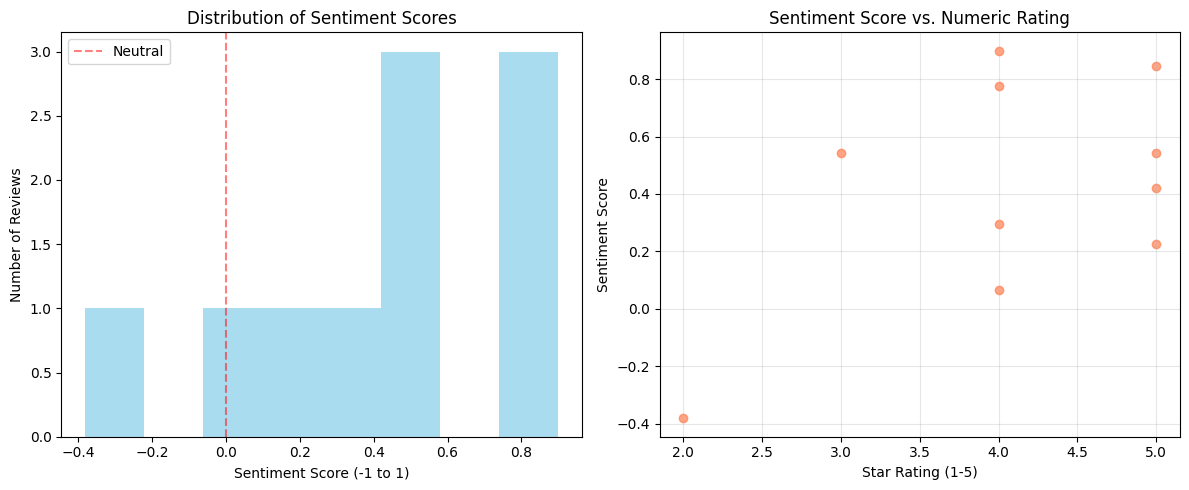

📊 What patterns do you notice?


In [11]:
# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sentiment distribution
axes[0].hist(df['sentiment_score'], bins=8, color='skyblue', alpha=0.7)
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Reviews')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.5, label='Neutral')
axes[0].legend()

# Sentiment vs. Rating scatter plot
axes[1].scatter(df['rating'], df['sentiment_score'], alpha=0.7, color='coral')
axes[1].set_title('Sentiment Score vs. Numeric Rating')
axes[1].set_xlabel('Star Rating (1-5)')
axes[1].set_ylabel('Sentiment Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 What patterns do you notice?")

SENTIMENT BY CATEGORY
               mean  count
category                  
Family        0.778      1
Musical       0.721      2
Historical    0.572      2
Contemporary  0.542      1
Classic       0.422      1
Comedy        0.064      1
Fantasy      -0.079      2


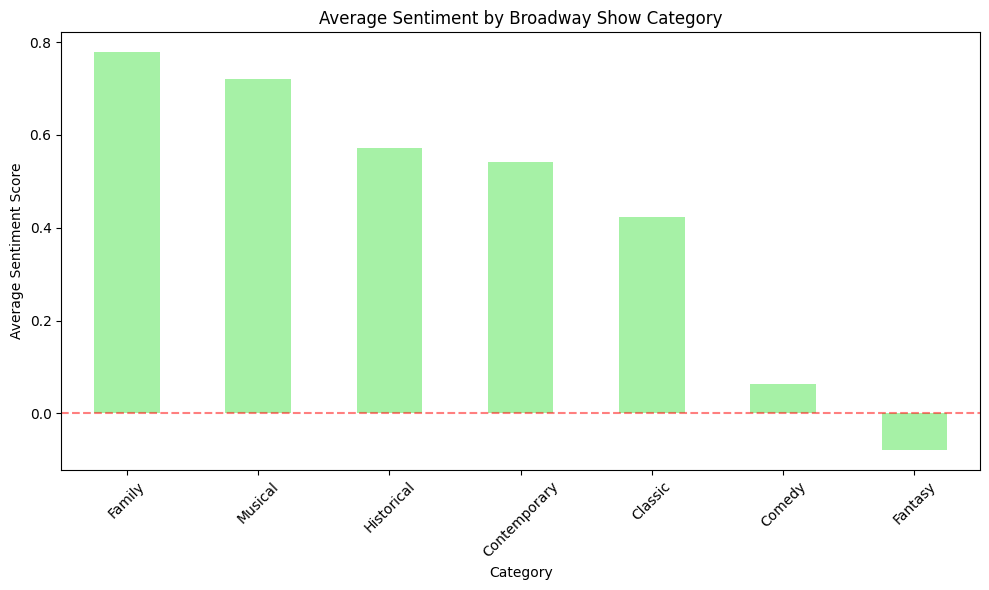

In [12]:
# Analyze sentiment by category
category_sentiment = df.groupby('category')['sentiment_score'].agg(['mean', 'count']).round(3)
category_sentiment = category_sentiment.sort_values('mean', ascending=False)

print("SENTIMENT BY CATEGORY")
print("=" * 25)
print(category_sentiment)

# Visualize category sentiment
plt.figure(figsize=(10, 6))
category_sentiment['mean'].plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Average Sentiment by Broadway Show Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Part 5: Critical Analysis - When VADER Gets It Wrong

Let's examine where automated sentiment analysis might struggle:

In [ ]:
# Test VADER on tricky cultural examples
tricky_texts = [
    "This show was so bad it was good",  # Irony
    "The ending was beautifully tragic",  # Mixed emotions
    "I literally died laughing",  # Hyperbole
    "It was... fine",  # Subtle negativity
    "Not the worst thing I've ever seen"  # Double negative
]

print("🤔 CHALLENGING CASES FOR SENTIMENT ANALYSIS")
print("=" * 50)

for text in tricky_texts:
    score = analyzer.polarity_scores(text)['compound']
    print(f"Text: '{text}'")
    print(f"VADER score: {score:.3f}")
    print(f"Your human judgment: _____")  # Students fill this in
    print()

### 💭 Notes for Final Reflection:

*Space for your thoughts during class - you'll use these for HW4-1:*

**Where VADER worked well:**
-
-

**Where VADER struggled:**
-
-

**Questions this raises about cultural texts:**
-
-

**Predictions for my own dataset:**
-
-

## Part 6: Preparing for HW4-1

You now have the skills for HW4-1! Let's review the complete workflow:

In [13]:
# Complete workflow summary
print("🎯 HW4-1 WORKFLOW CHECKLIST")
print("=" * 30)
print("✅ 1. Load your scraped CSV data")
print("✅ 2. Clean text (but keep punctuation for VADER)")
print("✅ 3. Make predictions about sentiment patterns")
print("✅ 4. Apply VADER to your dataset")
print("✅ 5. Create visualizations of sentiment patterns")
print("✅ 6. Compare predictions to actual results")
print("✅ 7. Analyze where VADER works/fails with your texts")
print("✅ 8. Reflect on insights and limitations")

print("\n🚀 You're ready for HW4-1!")

🎯 HW4-1 WORKFLOW CHECKLIST
✅ 1. Load your scraped CSV data
✅ 2. Clean text (but keep punctuation for VADER)
✅ 3. Make predictions about sentiment patterns
✅ 4. Apply VADER to your dataset
✅ 5. Create visualizations of sentiment patterns
✅ 6. Compare predictions to actual results
✅ 7. Analyze where VADER works/fails with your texts
✅ 8. Reflect on insights and limitations

🚀 You're ready for HW4-1!


### Looking Ahead: Topic Modeling Preview

**After HW4-1, you'll move to HW4-2** where you'll discover **hidden topics** in your text using machine learning.

**Quick preview**: While sentiment analysis asks "What emotions?", topic modeling asks "What themes and subjects are hiding in this collection?"

The text preprocessing you're learning now will prepare you for that next step!

## Summary: From Words to Emotions

Today you learned to:

**Technical Skills:**
- ✅ Install and use VADER sentiment analysis
- ✅ Process individual texts and entire datasets
- ✅ Interpret compound sentiment scores
- ✅ Create meaningful visualizations of emotional patterns

**Critical Thinking:**
- ✅ Compare different sentiment analysis tools
- ✅ Recognize where automated analysis succeeds and fails
- ✅ Question the objectivity of algorithmic emotion detection
- ✅ Connect computational analysis to cultural research questions

**Research Skills:**
- ✅ Form predictions and test them systematically
- ✅ Scale analysis from individual examples to entire datasets
- ✅ Document insights for deeper reflection
- ✅ Prepare text data for multiple types of analysis

### 🎯 You're Ready for HW4-1!

Apply these skills to your own scraped cultural dataset and discover what emotional patterns emerge from your data. Remember: being surprised by your results is a sign of genuine learning, not failure!

**Next**: Use your scraped data to complete the term frequency and sentiment analysis assignment, then get ready for topic modeling in HW4-2.